<a href="https://colab.research.google.com/github/dote7ant/Moringa_autolib/blob/master/Moringa_w4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Introduction

This weeks IP requires us to carry out a hypothesis test on a dataset. We will formulate our hypothesis and prepare our data to find evidence of null or alternate hypothesis.

**0.1 Formulating our hypothesis**


---
A study of the dataset [found here](http://bit.ly/DSCoreAutolibDataset) shows that sum of bluecars taken  population mean is pop_mean and the population standard deviation is pop_std. Given a sample of n ( found from using a sampling technique), the sample mean and standard deviation was found to be samp_mean and samp_std respectively.

1.   Test the null hypothesis at a significance level of 0.05. Is there evidence that the sum of bluecars taken population mean is not equal to pop_mean.





(null hypothesis) Ho: μ = pop_mean

---


(alternate hypothesis) Ha: μ ≠ pop_mean

---


**0.2 Defining the Metric for Success**


---


This analysis requires us to come up with a solution that will help determine whether our null hypothesis is to be accepted or rejected. We therefore need to identify the metrics that are significant in determining this from our dataset. 


---


**0.3) Understanding the context**


---


The data we are working with comes from a car company in France for the city of Paris where people rent electric cars for a certain duration and return them when done. It shows the date of rent, postal code, charging slots freed that date, number of recharging slots taken that day, bluecars taken and returned, utilib taken and returned, utilib14 taken and returned and the number of daily data point available for aggregation. 


---



***Below are the steps taken to implement this solution:***


---


1) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective.

2) Reading the data: Reading our data with an aim to understand the variables and observations.

3) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4) Data cleaning: performing all the data cleaning and preparations to make data ready for analysis.

5) EDA: the data was analysed and visualized.

6) Generating a sample: Find the appropriate sampling technique and generate a sample to use in implementing the solution.

7) Implementing the solution by finding the z-score, t-statistic, t-critical and the related p-values and finding out if it is smaller than or greater than the significance level.

8)Conclusion

---



A detailed Hypothesis report can be found here [click to go to report](https://docs.google.com/document/d/1Uvk9wmvZrV3jthMdkmL3gmhjjsBAfP03X4uPzKxBK3w/edit?usp=sharing).

## 1. Importing libraries and data

In [49]:
# import libraries
import pandas as pd
import numpy as np
import math as m

from scipy import stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# load the data set 
url = "/content/autolib_daily_events_postal_code.csv"

# load our working dataset
df = pd.read_csv(url)
df


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [51]:
# load our column explanation dataset
url1 = "/content/columns_explanation.xlsx"
df_col = pd.read_excel(url1)
df_col

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [52]:
# get the shape of the column explanation dataset  
df_col.shape

(13, 2)

We will not preview the df_col dataset again since we now know what it tells us about the df dataset.

## 2. Data Exploration

In [53]:
# preview the first 5 columns
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [54]:
# preview the last 5 columns
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [55]:
# get the shape of the dataset
df.shape

(16085, 13)

The dataset has 16,085 rows and 13 columns

In [56]:
# find out the column names
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [57]:
# examine our column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


We see that data has an object data type on the date column so we need to change that to date and time data type.

In [58]:
# get the count for columns with the data type as object 
df.describe(include=np.object)

,date,day_type
count,16085,16085
unique,156,2
top,2/4/2018,weekday
freq,104,11544


In [59]:
# get the statistical summaries of the columns with int data types. We get the count, mean, std, min, max, quartiles for each individual column
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [60]:
# check for unique values
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [61]:
# look at the unique postal codes
df['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [62]:
# look at the unique dates
df['date'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

## 3. Data cleaning

In [63]:
# convert the date column data type to datetime
df.date = pd.to_datetime(df.date)

In [64]:
# check to find out if the data type change was successfull
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [65]:
# check for missing values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing values

In [66]:
# rename our data columns to ones we can easily work with
df.rename({'Postal code' : 'postal_code', 'date' : 'date', 'n_daily_data_points' : 'num_data_points', 'dayOfWeek' : 'day_of_week', 'BlueCars_taken_sum' : 'sum_bluecar_t', 'BlueCars_returned_sum' : 'sum_bluecars_r', 'Utilib_taken_sum' : 'sum_utilib_t', 'Utilib_returned_sum' : 'sum_utilib_r', 'Utilib_14_taken_sum' : 'sum_utilib14_t', 'Utilib_14_returned_sum' : 'sum_utilib14_r', 'Slots_freed_sum' : 'sum_freed_slots', 'Slots_taken_sum' : 'sum_slots_t' }, axis=1, inplace=True)
df.columns
			

Index(['postal_code', 'date', 'num_data_points', 'day_of_week', 'day_type',
       'sum_bluecar_t', 'sum_bluecars_r', 'sum_utilib_t', 'sum_utilib_r',
       'sum_utilib14_t', 'sum_utilib14_r', 'sum_freed_slots', 'sum_slots_t'],
      dtype='object')

Columns successfully changed.

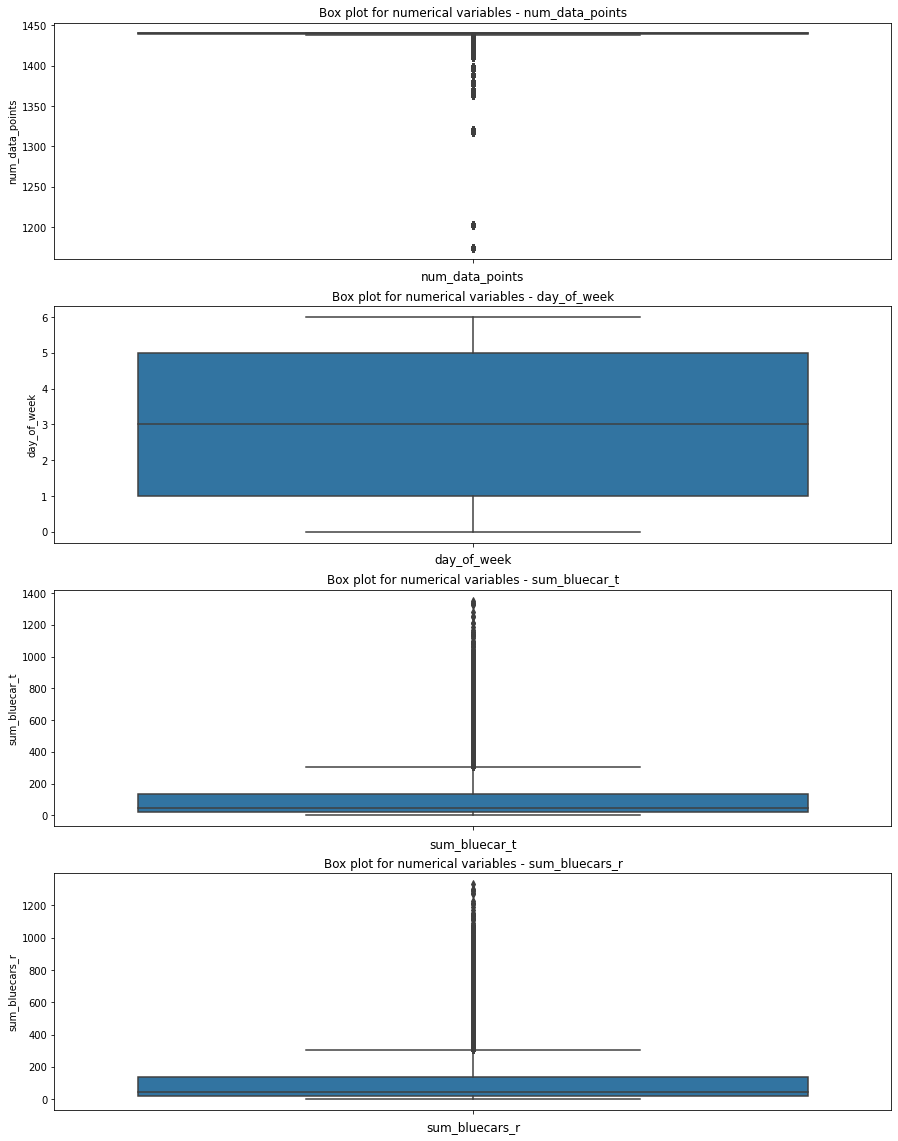

In [67]:
# check for outliers
# we plot for the num data points aggregrate, day of the week , sum of blue cars taken and returned
col_names= ['num_data_points', 'day_of_week', 'sum_bluecar_t', 'sum_bluecars_r']

fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

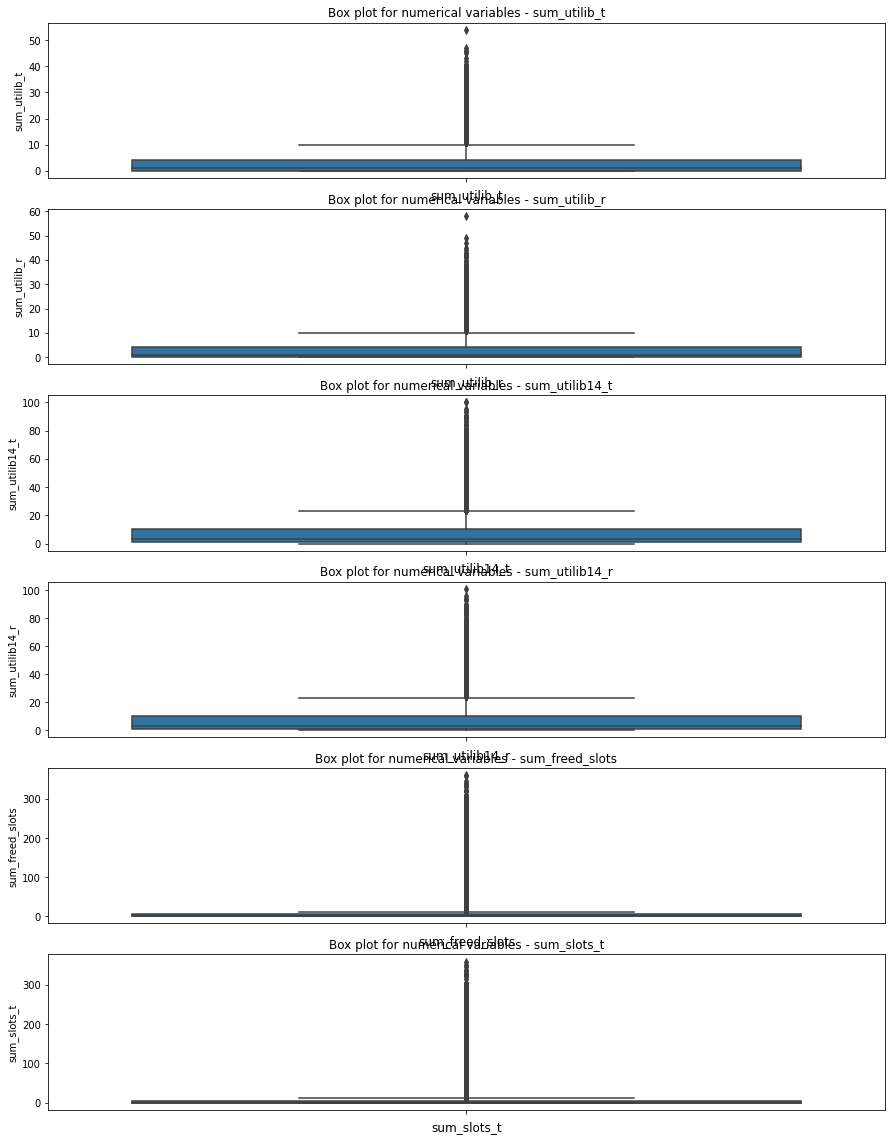

In [68]:
# outliers checking part 2
# we plot for sum of utilib taken and returned, summ of utilib 14 taken and returned, sum of freed slots and sum of slots taken
col_names = ['sum_utilib_t', 'sum_utilib_r', 'sum_utilib14_t', 'sum_utilib14_r', 'sum_freed_slots', 'sum_slots_t']
fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

We decide not to drop our outliers since from intial exploration we did not see any wierd values, the outliers observed could be that that day a particular car was picked up alot thus cascading this to the return columns. 
For the slots the same can be assumed. 

# 4. Exploratory analysis

## **a. Univariate analysis**

In [124]:
# get summary statistics
df.describe()

,postal_code,num_data_points,day_of_week,sum_bluecar_t,sum_bluecars_r,sum_utilib_t,sum_utilib_r,sum_utilib14_t,sum_utilib14_r,sum_freed_slots,sum_slots_t
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [69]:
# find the skew of the data columns
df.skew()

postal_code       -1.168778
num_data_points   -5.742776
day_of_week        0.018824
sum_bluecar_t      2.406355
sum_bluecars_r     2.412085
sum_utilib_t       2.556872
sum_utilib_r       2.578665
sum_utilib14_t     2.510924
sum_utilib14_r     2.511488
sum_freed_slots    2.597406
sum_slots_t        2.596904
dtype: float64

We have a high % of positive skewness.

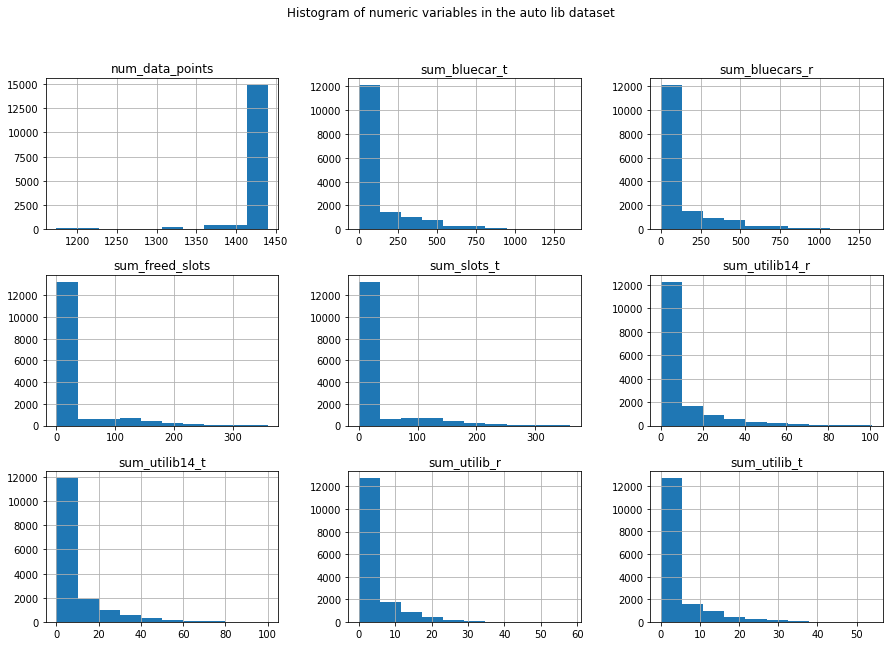

In [70]:
# plot our numerical variables to find more information about our data in a histogram
dfnew = df.copy()
dfnew.drop(['day_type', 'postal_code', 'day_of_week'] ,axis=1).hist(bins=10, figsize=(15,10))
plt.suptitle("Histogram of numeric variables in the auto lib dataset")
plt.savefig('Auto lib Histogram')
plt.show()


We observe that the num-data_points column is negatively skewed while the rest are positively skewed.

In [103]:
# find the kurtosis of our data columns
df.kurt()

postal_code        -0.542143
num_data_points    36.594846
day_of_week        -1.260994
sum_bluecar_t       6.172692
sum_bluecars_r      6.186288
sum_utilib_t        7.702362
sum_utilib_r        7.936357
sum_utilib14_t      7.186815
sum_utilib14_r      7.185463
sum_freed_slots     6.454514
sum_slots_t         6.442553
dtype: float64

We observe that most of the columns are leptokuritc with two of them being platykurtic.

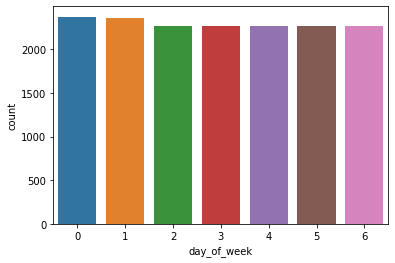

In [74]:
# find the count of the days of the week
sns.countplot(df['day_of_week'])

We see that Monday and Tuesday have the highest count followed by the rest. It is important to not that the rest of the days are not that far off.

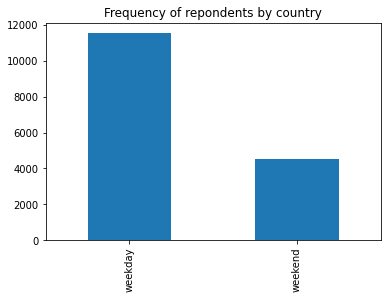

In [78]:
# Find the frequency of the day type
df['day_type'].value_counts().plot.bar(title='Frequency of repondents by country')

We can see that the weekdays are the most busy.

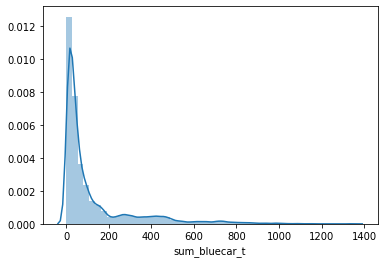

In [82]:
# distribution plot for hte sum of bluecars taken
sns.distplot(df['sum_bluecar_t'], bins=50)

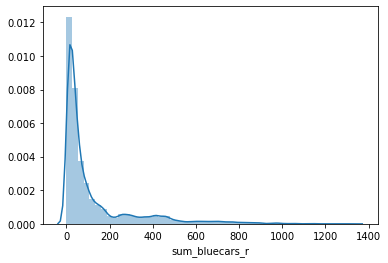

In [83]:
# distribution for sum of blue cars returned
sns.distplot(df['sum_bluecars_r'], bins=50)

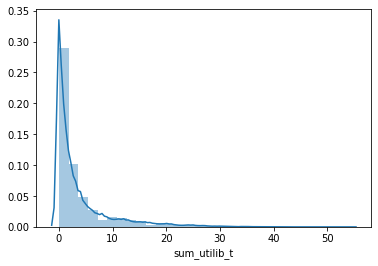

In [86]:
# distribution of sum of utilib taken
sns.distplot(df['sum_utilib_t'], bins=30)

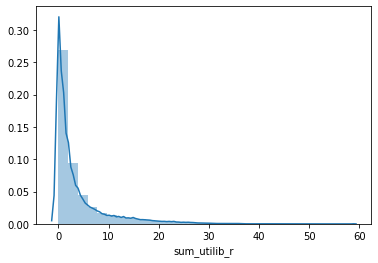

In [88]:
# distribution of utilib returned
sns.distplot(df['sum_utilib_r'], bins=30)

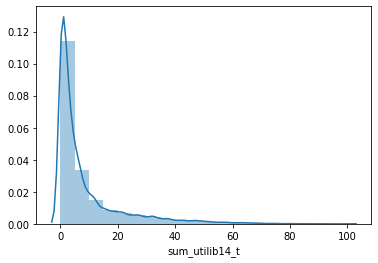

In [92]:
# distribution of utilib 14 taken
sns.distplot(df['sum_utilib14_t'], bins=20)

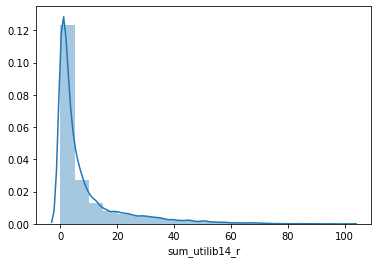

In [90]:
# distribution of utilib 14 returned
sns.distplot(df['sum_utilib14_r'], bins=20)

## b. Bivariate analysis

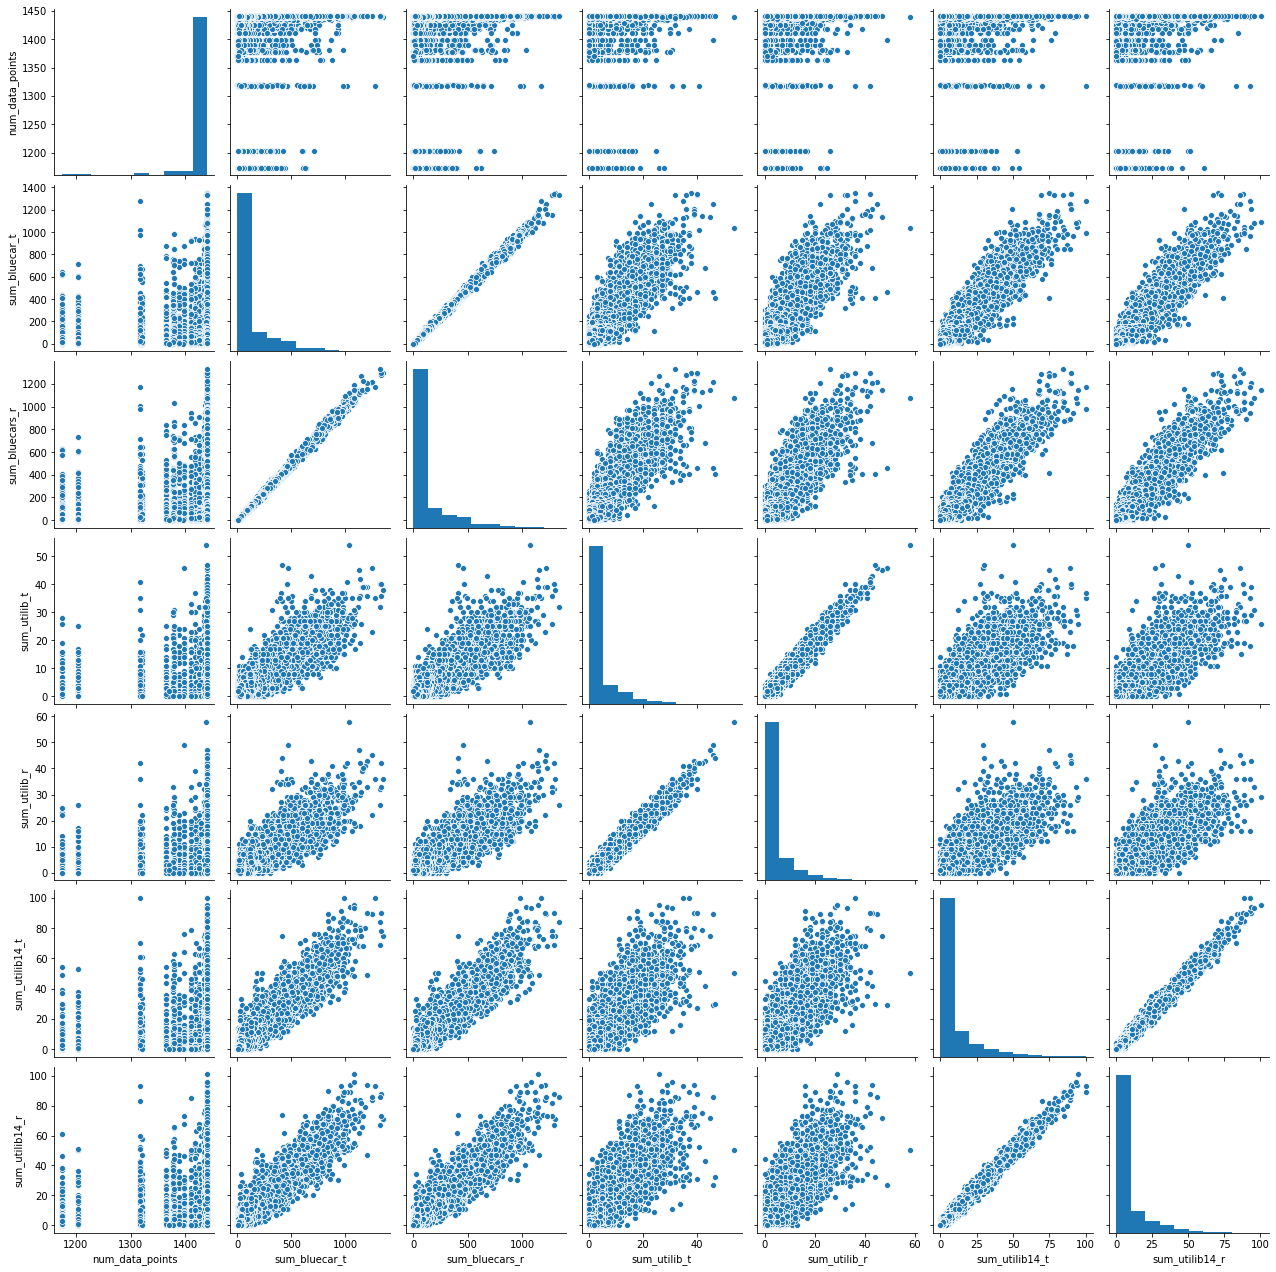

In [97]:
# plotting our bivariate summaries
sns.pairplot(df[['num_data_points', 'sum_bluecar_t', 'sum_bluecars_r', 'sum_utilib_t', 'sum_utilib_r', 'sum_utilib14_t', 'sum_utilib14_r']])
plt.show()

In [98]:
# find the correlation of our dataset columns
corr = df.corr()
corr

,postal_code,num_data_points,day_of_week,sum_bluecar_t,sum_bluecars_r,sum_utilib_t,sum_utilib_r,sum_utilib14_t,sum_utilib14_r,sum_freed_slots,sum_slots_t
postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
num_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
day_of_week,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
sum_bluecar_t,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
sum_bluecars_r,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
sum_utilib_t,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
sum_utilib_r,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
sum_utilib14_t,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
sum_utilib14_r,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
sum_freed_slots,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


from the matrix above we observe our correlation that we have relatively high correlation in the sum* columns.

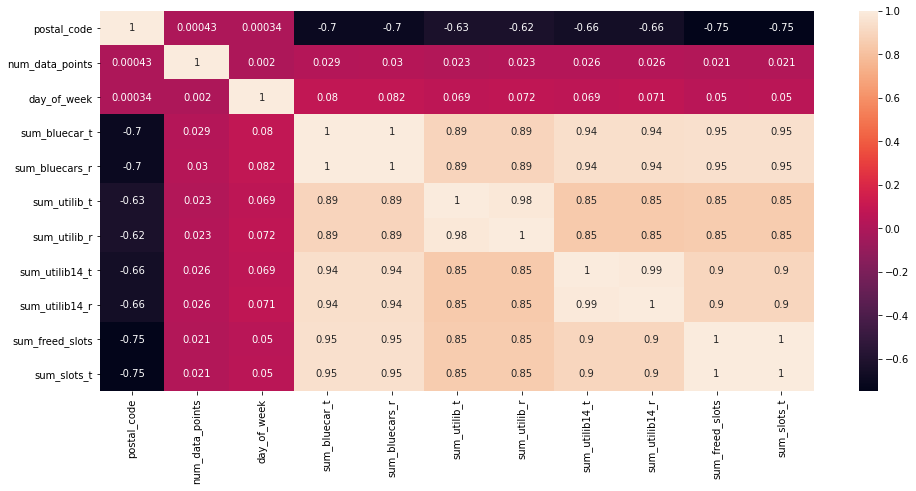

In [102]:
# plotting a heat map for the correlation
plt.figure(figsize = (16,7))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, annot=True)

We observe that the sum columns have pretty high correlation going as high as 1 in some cases where the least is 0.85.

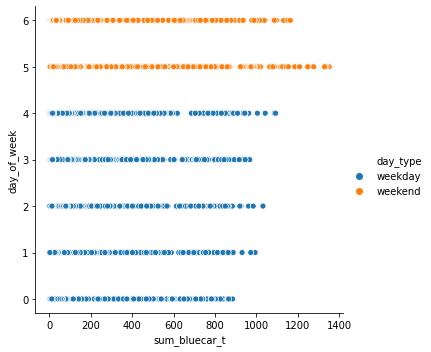

In [110]:
sns.relplot( x = 'sum_bluecar_t', y = 'day_of_week', hue = 'day_type',data= df)

We do see that the weekends have a 

# 5. Hypothesis testing

Assumptions


1.  Distribution is normal
2. Sample is randomly selected from the population
3. Sample data is representative of the whole population and can therefore estimate population parameters
4. Approximately equal variances of the population and sample.



## a. Getting a sample

In [115]:
# get the value counts of the postal code
df['postal_code'].value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [116]:
# get the value counts of the day of week
df['day_of_week'].value_counts()

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: day_of_week, dtype: int64

We want to use stratified random sampling and for our strata we take postal code and day of the week. We feel like this will be the most inclusive and every region will be touched thus our results are more accurate.

In [118]:
# generate a sample from the df dataset where we choose a 10% inclusion.
strat_output = df.groupby(['postal_code', 'day_of_week'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
# Check the stratified output
print(strat_output['postal_code'].value_counts())
print(strat_output['day_of_week'].value_counts())

92150    14
92140    14
92390    14
92400    14
94450    14
         ..
75013    14
75014    14
75015    14
92160    14
93390     7
Name: postal_code, Length: 104, dtype: int64
6    207
5    207
4    207
3    207
2    207
1    207
0    207
Name: day_of_week, dtype: int64


We observe that we have relatively achieved our strata goals for the postal code. Since the count of days of the week were so close together we ended up with an equal inclusion across our sample.

In [119]:
# get our sample shape
strat_output.shape

(1449, 13)

We have a sample of size n = 1449. We then get the columns we need.

In [134]:
# assign variable n to the sample size to be used later on
n = 1449

In [123]:
# find if there are any missing values
strat_output.isnull().sum()

postal_code        0
date               0
num_data_points    0
day_of_week        0
day_type           0
sum_bluecar_t      0
sum_bluecars_r     0
sum_utilib_t       0
sum_utilib_r       0
sum_utilib14_t     0
sum_utilib14_r     0
sum_freed_slots    0
sum_slots_t        0
dtype: int64

In [122]:
# get the columns we want to work with
strat_new = strat_output[['postal_code', 'day_of_week', 'num_data_points', 'day_type', 'sum_bluecar_t', 'sum_bluecars_r']]
strat_new

,postal_code,day_of_week,num_data_points,day_type,sum_bluecar_t,sum_bluecars_r
67,75001,0,1440,weekday,99,98
42,75001,0,1440,weekday,115,111
29,75001,1,1440,weekday,103,103
8,75001,1,1439,weekday,81,84
37,75001,2,1439,weekday,98,99
...,...,...,...,...,...,...
16035,95880,4,1417,weekday,10,8
16074,95880,5,1440,weekend,15,15
16015,95880,5,1440,weekend,23,23
15935,95880,6,1440,weekend,28,17


## b. Getting our values to use in the hypothesis test

### 1. population values

Find the population mean and standard deviation of sum of bluecars taken (sum_bluecar_t) and returned.

In [125]:
# both taken and returned
df[['sum_bluecar_t', 'sum_bluecars_r']].mean()

sum_bluecar_t     125.926951
sum_bluecars_r    125.912714
dtype: float64

Population mean of bluecars taken is 125.926951

Find the standard deviation


In [126]:
# both taken and returned
df[['sum_bluecar_t', 'sum_bluecars_r']].std()

sum_bluecar_t     185.426579
sum_bluecars_r    185.501535
dtype: float64

Population standard deviation of bluecars taken is 185.426579.

---

We will round off our values to 4 decimal places next. Then assign them to variables we will use later on.

In [127]:
# rounding off mean
pop_mean = round(df['sum_bluecar_t'].mean(), 4)
pop_mean

125.927

In [128]:
# rounding off standard deviation
pop_std = round(df['sum_bluecar_t'].std(), 4)
pop_std

185.4266

### 2. Sample values

Find the sample mean

In [130]:
# both taken and returned
strat_new[['sum_bluecar_t', 'sum_bluecars_r']].mean()

sum_bluecar_t     125.746032
sum_bluecars_r    125.801242
dtype: float64

Sample mean of bluecars taken is 125.746032

Find sample standard deviation

In [131]:
# both taken and returned
strat_new[['sum_bluecar_t', 'sum_bluecars_r']].std()

sum_bluecar_t     186.938756
sum_bluecars_r    186.952310
dtype: float64

Sample standard deviation is 186.938756

Round off the meand and standard deviation to 4 decimal places and assign the values to variables.

In [132]:
# rounding off sample mean
samp_mean = round(strat_new['sum_bluecar_t'].mean(), 4)
samp_mean

125.746

In [133]:
# rounding off sample standard deviation
samp_std = round(strat_new['sum_bluecar_t'].std(), 4)
samp_std

186.9388

## c. z-test

Formula to find the z score is (sample mean - population mean)/ population standard deviation

We will use an alpha( significance level) of 0.05 

In [142]:
# calculate the z-score
alpha_z = 0.05
zscore = (samp_mean - pop_mean)/ pop_std
zscore

-0.0009761274811705095

In [146]:
# find the p-value
prob = round(1 - stats.norm.cdf(zscore), 4)
prob

0.5004

In [147]:
# interpret via p value
if prob > alpha_z:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


## d. t-test

Formula to find the t-statistic is (sample mean - population mean)/ (sample standard deviation/ squareroot of n) where n is sample size.

We will use a alpha(significance level) of 0.05

In [138]:
# calculate the t-statistic
t = (samp_mean - pop_mean)/ (samp_std/m.sqrt(n))
t

-0.03685643432216603

In [150]:
# degrees of freedom
df = n - 1

# where the significance level is 0.05 but it's a two tailed test so we divide our alpha into 2 for the left and right tail.
# get the t-critical value
alpha = 0.05
alpha_t = alpha/2

# ppf is percent point function
t_critical_value = stats.t.ppf(q=alpha_t, df=df)
t_critical_value


-1.961603640402749

In [153]:
# find the t-statistic and the two-tailed p value
t_statistic, two_tailed_p_value = stats.ttest_1samp(a=strat_new['sum_bluecar_t'], popmean=pop_mean)
t_statistic

-0.03684997868505027

In [154]:
# find the p value 
one_tail_p_value = round(two_tailed_p_value*2, 5)
one_tail_p_value

1.94122

In [157]:
# interpret via p value
prob = one_tail_p_value
if prob > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


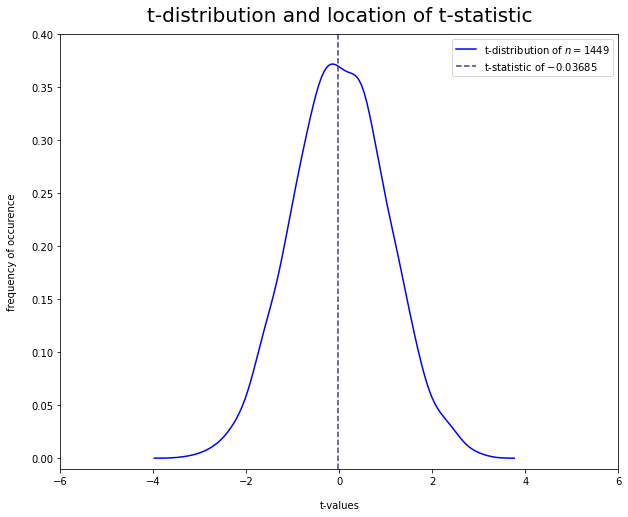

In [158]:
# visualization of t-distribution and t-statistic 
plt.figure(figsize=(10, 8))
np.random.seed(5)
t_distribution_df_28 = np.random.standard_t(n, size=3000)
sns.distplot(t_distribution_df_28, color='blue', hist=False, label='t-distribution of $n=1449$')
plt.axvline(x=t_statistic, color='darkslateblue', linestyle='--', label='t-statistic of $-0.03685$')
plt.xlabel("t-values", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.title("t-distribution and location of t-statistic", y=1.015, fontsize=20)
plt.ylim(-.01, .4)
plt.xlim(-6, 6)
plt.legend();

##e. Interpration and conclusions



---


**Z- test**

---


The p value of 0.5004 is greater than the initial alpha level of 0.05. This p-value tells us the probability of getting this z-score if hte null hypothesis is true. 
Therefore, there is sufficient evidence to accept the null hypothesis. That the population mean is equal to 125.927.

---
**T-test**

---



Ths t-statistic of -0.03685 is greater than the t-critical value of -1.9616
Also, the p-value of 1.94122 is greater than the initial alpha level of 0.05. This p-value tells us the probability of getting this t-statistic if the null hypothesis is true.

Therefore, there is sufficient evidence to accept the null hypothesis.That the population mean is equal to 125.927.


---



It is clear that from both our hypothesis tests that they yeild similar results to allow us to accept the null hypothesis.

A detailed Hypothesis report can be found here [click to go to report](https://docs.google.com/document/d/1Uvk9wmvZrV3jthMdkmL3gmhjjsBAfP03X4uPzKxBK3w/edit?usp=sharing).